# Lecture 6

### Main Sequence of Star Forming galaxies

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy
from astropy.table import Table
#!pip install pandas
import pandas

Read the fits file and extract the stellar mass and the SFR

In [2]:
data=Table.read('SDSS_LAB2024_CIGALEresults.fits', format = 'fits')
data=data.to_pandas()
mass=np.array(data.loc[:,"bayes_stellar_m_star"])
sfr=np.array(data.loc[:,"bayes_sfh_sfr"])
sfr_err=np.array(data.loc[:,"bayes_sfh_sfr_err"])
age=np.array(data.loc[:,"bayes_sfh_age"])
tau=np.array(data.loc[:,"bayes_sfh_tau_main"])

Visualize the data

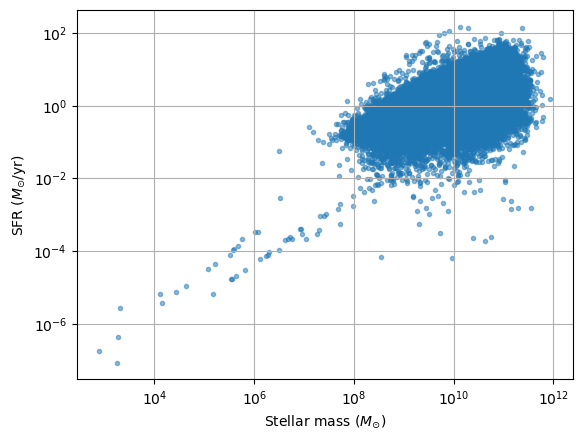

In [3]:
plt.scatter(mass, sfr, marker='.', alpha=0.5)
plt.loglog()

plt.xlabel('Stellar mass ($M_{\odot}$)')
plt.ylabel('SFR ($M_{\odot}$/yr)')

plt.grid()
plt.show()

Compute the log of the data

In [4]:
MASS = np.log10(mass)
SFR = np.log10(sfr)

Try and fit the log of the data with a straight line

In [5]:
par = np.polyfit(MASS, SFR, 1)
print("Parameters: " + str(par))

Parameters: [ 0.36465456 -3.31579663]


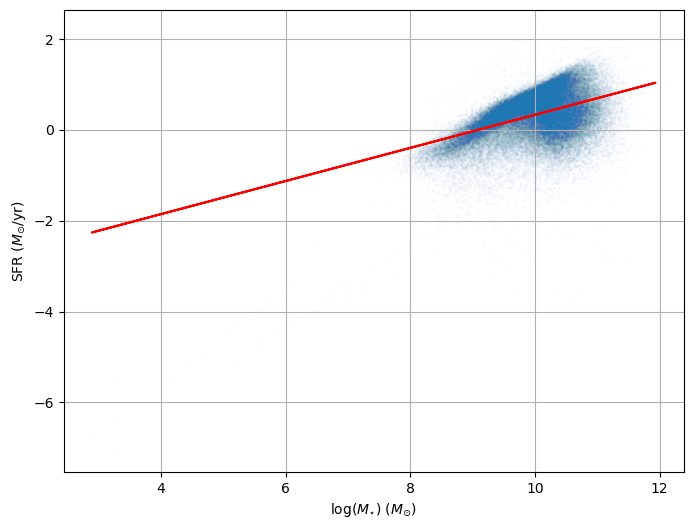

In [6]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(MASS, SFR, marker='.', s=7, alpha=0.01)
plt.plot(MASS, np.polyval(par, MASS), color='red')

plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('SFR ($M_{\odot}$/yr)')

plt.grid()
plt.show()

We see that the fit is not good to describe the main sequence of star forming galaxies. We need to cut the quiescent (passive) galaxies. To do so, we make the slope horizontal by computing the specific sfr, so divide the sfr by the mass (subtruct if we work with the log). Then we cut the points under a certain threshold (chosen by us, trying to keep most of the main sequence galaxies).

<span style="color:red">! check the units of sSFR !</span> 

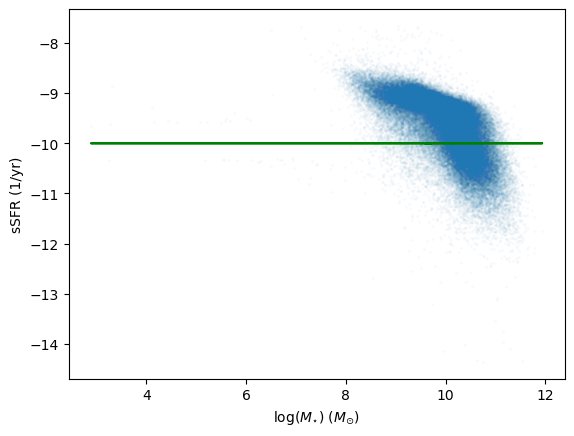

In [7]:
sSFR = SFR - MASS

def const(x, a):
    return 0*x+a


#Visualize the data

plt.scatter(MASS, sSFR, marker='.', s=7, alpha = 0.02)
plt.plot(MASS, const(MASS, -10), color = 'green')

plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

#plt.grid()
plt.show()

In [8]:
# Cut the data
mask = sSFR > -10
MASS_filtered = MASS[mask]
sSFR_filtered = sSFR[mask]

print("Vettore x filtrato:", MASS_filtered)
print("Vettore y filtrato:", sSFR_filtered)

Vettore x filtrato: [ 9.35080104 10.45810975  9.47033462 ... 10.81198142  9.93869918
  9.5954972 ]
Vettore y filtrato: [-9.0976119  -9.45328382 -9.05200279 ... -9.96918474 -9.58921803
 -9.11049586]


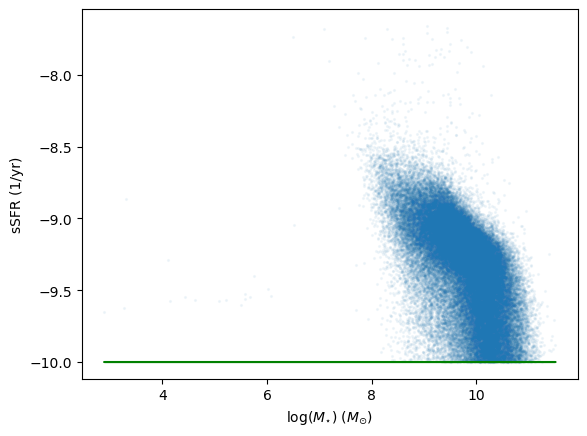

In [9]:
plt.scatter(MASS_filtered, sSFR_filtered, marker='.', s=7, alpha=0.05)
plt.plot(MASS_filtered, const(MASS_filtered, -10), color = 'green')

plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

#plt.grid()
plt.show()

Now we go back to SFR and redo the fit with the filtered data

In [10]:
SFR_filtered = sSFR_filtered + MASS_filtered

In [11]:
par_new = np.polyfit(MASS_filtered, SFR_filtered, 1)
print("Parameters: " + str(par_new))

Parameters: [ 0.66842452 -6.09766588]


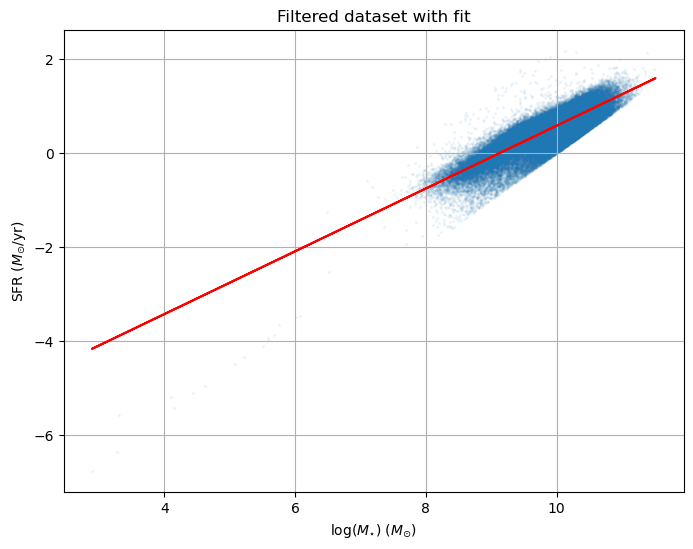

In [12]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(MASS_filtered, SFR_filtered, marker='.', s=7, alpha = 0.05)
plt.plot(MASS_filtered, np.polyval(par_new, MASS_filtered), color='red')

plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('SFR ($M_{\odot}$/yr)')
plt.title('Filtered dataset with fit')

plt.grid()
plt.show()

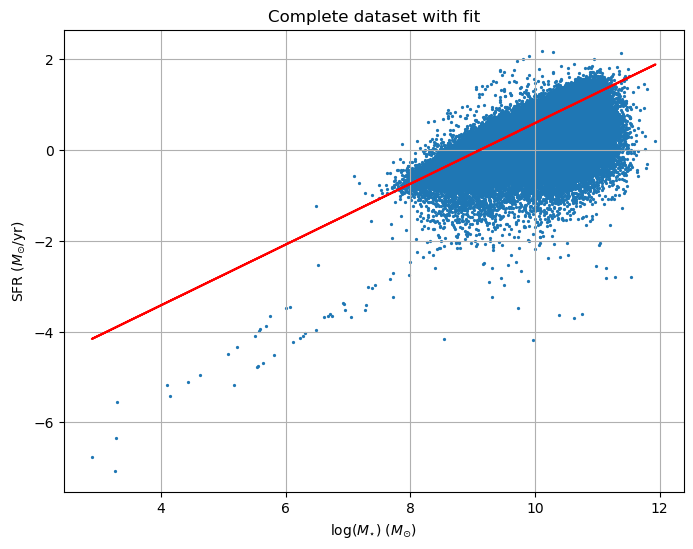

In [13]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(MASS, SFR, marker='.', s=7, alpha=1)
plt.plot(MASS, np.polyval(par_new, MASS), color='red')

plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('SFR ($M_{\odot}$/yr)')
plt.title('Complete dataset with fit')

plt.grid()
plt.show()

# Lecture 7 

What is the distribution of metallicities? Does it depend on other galaxy properties?

In [14]:
spec=Table.read('SDSS_LAB2024_spectroscopy.fits', format = 'fits')
spec=spec.to_pandas()
metallicity=np.array(spec.loc[:,"log_oh"])

We select galaxies where the metallicity data are not missing.
For all galaxies with missing data about metallicity, we neglect their parameters (such as mass and age).
We plot each galaxy metallicity as a function of their stellar mass (in log scale).
It's always better to plot other parameters (metallicity, age, ...) as a function of mass, keeping the mass as the independent variable (it could be considered the "leading parameter" that describes the galaxy evolution or structure)


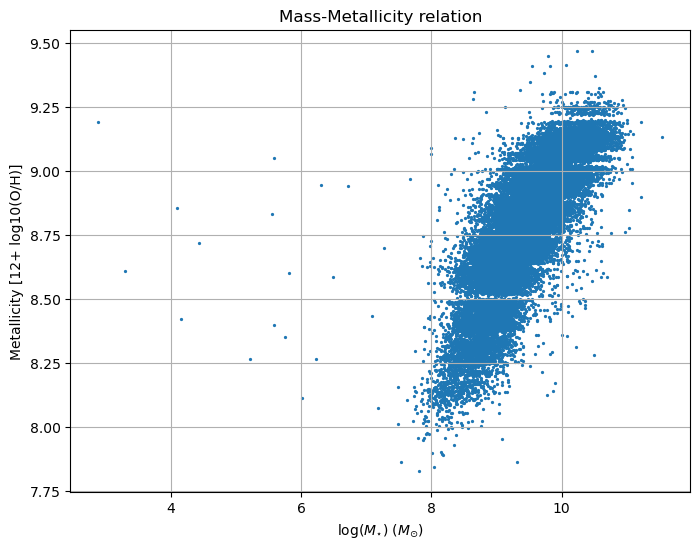

In [15]:
mask = metallicity > -9998
metal = metallicity[mask]
mass_metal = mass[mask]
age_metal = age[mask]
tau_metal = tau[mask]
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(np.log10(mass_metal), metal, marker='.', s=7, alpha=1)

plt.ylabel('Metallicity [12+ log10(O/H)]')
plt.title('Mass-Metallicity relation')
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')

plt.grid()
plt.show()

OBSERVATIONS:
Metallicity grows with the stellar mass of the galaxy. 

We assumed that galaxies have a star formation history. 
In the beginning the gas cloud is only H and He: stars begin to form. SN events and explosions produce and fill the gas cloud of metals: metallicity increases.
Then new star keep forming from H, He and metals: stellar mass of the galaxy grows due to star formation and metallicity increases too.


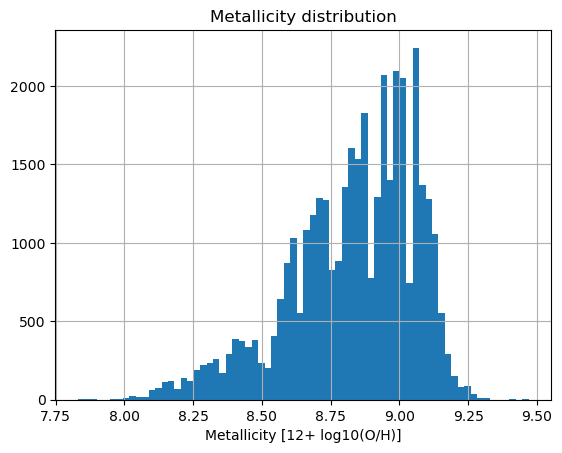

In [16]:
plt.hist(metal,70)
plt.title('Metallicity distribution')
plt.xlabel('Metallicity [12+ log10(O/H)]')
plt.grid()
plt.show()

We plot the galaxy ages normalized to the tau parameter (tau is the parameter of the star formation history = exp(-t/tau)) as a function of the metallicity

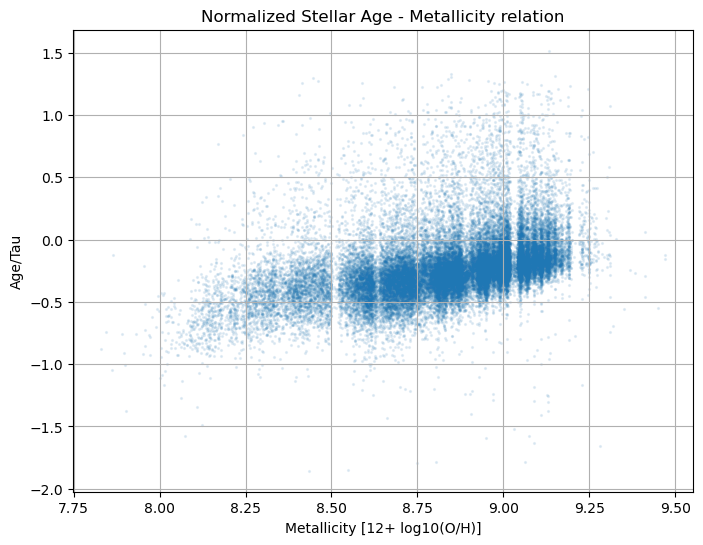

In [17]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(metal, np.log10(age_metal/tau_metal), marker='.', s=7, alpha=0.1)

plt.xlabel('Metallicity [12+ log10(O/H)]')
plt.ylabel('Age/Tau')
plt.title('Normalized Stellar Age - Metallicity relation')

plt.grid()
plt.show()

Is the fraction of AGN correlated to the other galaxy properties?

In [18]:
oiii = np.array(spec.loc[:,'oiii_5007_flux'])
oiii_err = np.array(spec.loc[:, 'oiii_5007_flux_err'])
nii = np.array(spec.loc[:,'nii_6584_flux'])
nii_err = np.array(spec.loc[:, 'nii_6584_flux_err'])
halpha = np.array(spec.loc[:,'h_alpha_flux'])
halpha_err = np.array(spec.loc[:,'h_alpha_flux_err'])
hbeta = np.array(spec.loc[:,'h_beta_flux'])
hbeta_err = np.array(spec.loc[:, 'h_beta_flux_err'])

We want to study the sources of gas ionization in the galaxy nuclei.

We select galaxies which have a suffiecient Signal-to-Noise ratio (>5) in the emission line fluxes.

*Signal to Noise Ratio = Flux/(error on the Flux)

Forbidden lines are indicators of temperature.

 - Stronger forbidden lines means higher temperature gas, which means more collisions, which means higher electron velocity, which means high energy ionizing photons, which means quasar photons.

 - Weak forbidden lines => young stars.

*forbidden = transitions allowed by quadrupole transition rule; those are forbidden by dipole transition rule because the time the electron needs to spend on the level to emit a photon would be too much. These lines appear because the universe has very low density, on Earth those lines wouldn’t appear in the spectrum of ionized gas.

Red line: log([OIII]/Hβ) = 0.61/(log([NII]/Hα)− 0.05) + 1.3

 - Points above the line: then the center of the galaxy contains an AGN

 - Points below the line: then it’s just a group of young stars


We plot the ratios between emission line fluxes

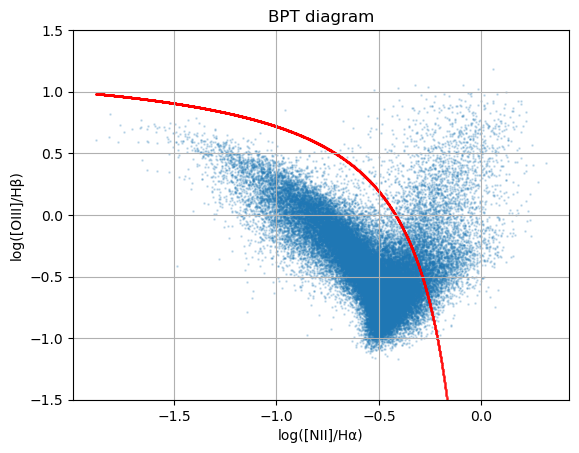

In [19]:
mask_lines = (oiii/oiii_err > 5) & (nii/nii_err > 5) & (halpha/halpha_err > 5) & (hbeta/hbeta_err > 5)
oiii_lines = oiii[mask_lines]
nii_lines = nii[mask_lines]
halpha_lines = halpha[mask_lines]
hbeta_lines = hbeta[mask_lines]
mass_lines = mass[mask_lines]

y = np.log10(oiii_lines/hbeta_lines)
x = np.log10(nii_lines/halpha_lines)

def agn (x):
    return 0.61/(x-0.05) + 1.3

x_grid = np.linspace(np.min(x), np.max(x), 10000)
plt.scatter(x, y, marker = '.', s = 3, alpha=0.2)
plt.scatter(x_grid, agn(x_grid), color = 'red', marker='.', s=0.2)
plt.ylim(-1.5,1.5)
plt.xlabel('log([NII]/Hα)')
plt.ylabel('log([OIII]/Hβ)')
plt.title('BPT diagram')
plt.grid()
plt.show()

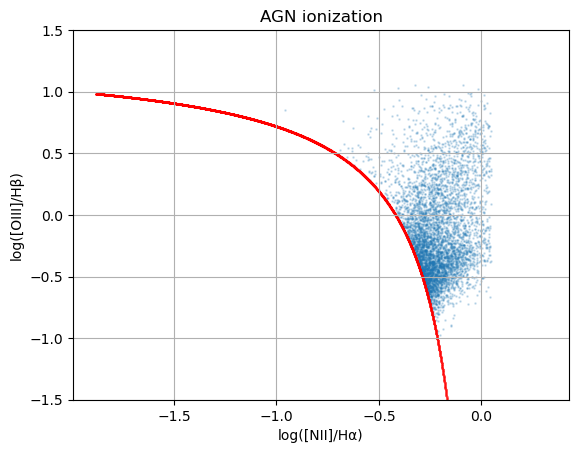

In [20]:
mask_agn = (y > agn(x)) 
y_new = y[mask_agn]
x_new = x[mask_agn]
mass_new = mass_lines[mask_agn]

plt.scatter(x_new, y_new, marker = '.', s = 3, alpha=0.2)
plt.scatter(x_grid, agn(x_grid), color = 'red', marker='.', s=0.2)
plt.ylim(-1.5,1.5)
plt.xlabel('log([NII]/Hα)')
plt.ylabel('log([OIII]/Hβ)')
plt.title('AGN ionization')
plt.grid()
plt.show()

Galaxies in which gas is ionized by the presence of an AGN are green dots.

Galaxies in which gas is ionized by groups of young stars are orange dots.

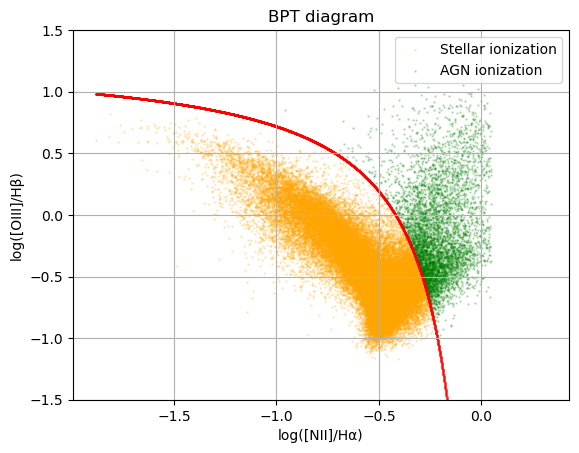

In [21]:
mask_stellar = (y < agn(x)) & (x < 0)
y_s = y[mask_stellar]
x_s = x[mask_stellar]
mass_s = mass_lines[mask_stellar]

plt.scatter(x_s, y_s, marker = '.', s = 3, color = 'orange', alpha=0.2, label='Stellar ionization')
plt.scatter(x_new, y_new, marker = '.', s = 3,color = 'g', alpha=0.2, label='AGN ionization')
plt.scatter(x_grid, agn(x_grid), color = 'red', marker='.', s=0.2)
plt.xlabel('log([NII]/Hα)')
plt.ylabel('log([OIII]/Hβ)')
plt.title('BPT diagram')
plt.legend()

plt.ylim(-1.5,1.5)
plt.grid()
plt.show()

We plot the mass distribution for galaxies in which gas is ionized by AGN (green), for galaxies in which gas is ionized by stars (orange) and the total mass distribution.

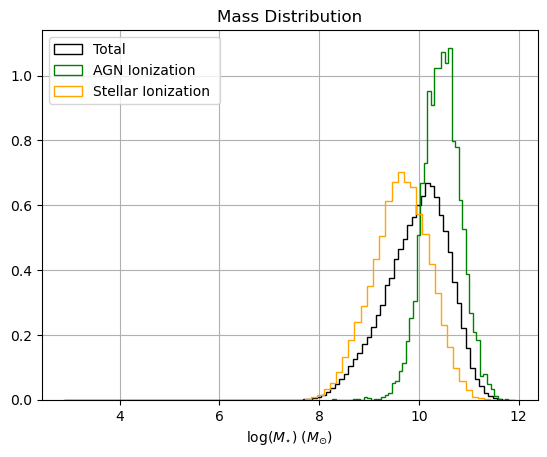

In [22]:
plt.hist(np.log10(mass), density=True, histtype='step', bins=100, color= 'k', label='Total')
plt.hist(np.log10(mass_new), density=True, histtype='step', bins=50, color = 'g', label="AGN Ionization ")
plt.hist(np.log10(mass_s), density=True, histtype='step', bins=70, color = 'orange', label="Stellar Ionization ")
plt.legend()
plt.title("Mass Distribution")
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.grid()
plt.show()

OBSERVATIONS:
More massive galaxies are more likely to have an AGN.

We also know more massive galaxies are more likely to be passive.
What is the relation?

In an AGN galaxy there’s gas, but the gas doesn’t form star.
Stars form in giant molecular clouds (few hundred kelvin of temperature)
=> Too high temperature due to the presence of the AGN; it stops the formation of molecular clouds => no star formation
